In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data preparation

In [2]:
defaultCC = pd.read_csv('C:/Users/padma/Downloads/UCI_Credit_Card.csv', index_col = 'ID')

In [3]:
defaultCC_1 = defaultCC.copy()

In [4]:
defaultCC.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [5]:
defaultCC.rename(columns = lambda x:x.lower(), inplace=True)

In [6]:
defaultCC.head(4)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [7]:
#Base Values : female, other_education, not_married

In [8]:
defaultCC['grad_school'] = (defaultCC['education'] == 1).astype('int')
defaultCC['university'] = (defaultCC['education'] == 2).astype('int')
defaultCC['high_school'] = (defaultCC['education'] == 3).astype('int')
defaultCC.drop(['education'],1,inplace = True)

In [9]:
defaultCC.head(10)

,limit_bal,sex,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month,grad_school,university,high_school
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,1,24,2,2,-1,-1,-2,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0
2,120000.0,2,2,26,-1,2,0,0,0,2,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0
3,90000.0,2,2,34,0,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0
4,50000.0,2,1,37,0,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0
5,50000.0,1,1,57,-1,0,-1,0,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0
6,50000.0,1,2,37,0,0,0,0,0,0,...,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,1,0,0
7,500000.0,1,2,29,0,0,0,0,0,0,...,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,1,0,0
8,100000.0,2,2,23,0,-1,-1,0,0,-1,...,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,1,0
9,140000.0,2,1,28,0,0,2,0,0,0,...,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,0,0,1


In [10]:
defaultCC['male'] = (defaultCC['sex'] == 1).astype('int')
defaultCC.drop(['sex'],1,inplace=True)

In [11]:
defaultCC.head(10)

,limit_bal,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month,grad_school,university,high_school,male
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,1,24,2,2,-1,-1,-2,-2,3913.0,...,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0
2,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0
3,90000.0,2,34,0,0,0,0,0,0,29239.0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0
4,50000.0,1,37,0,0,0,0,0,0,46990.0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0
5,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,1
6,50000.0,2,37,0,0,0,0,0,0,64400.0,...,1815.0,657.0,1000.0,1000.0,800.0,0,1,0,0,1
7,500000.0,2,29,0,0,0,0,0,0,367965.0,...,40000.0,38000.0,20239.0,13750.0,13770.0,0,1,0,0,1
8,100000.0,2,23,0,-1,-1,0,0,-1,11876.0,...,601.0,0.0,581.0,1687.0,1542.0,0,0,1,0,0
9,140000.0,1,28,0,0,2,0,0,0,11285.0,...,0.0,432.0,1000.0,1000.0,1000.0,0,0,0,1,0


In [12]:
defaultCC['married'] = (defaultCC['marriage'] == 1).astype('int')
defaultCC.drop(['marriage'],1,inplace=True)

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)



OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [14]:
defaultCC.head(10)

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1
6,50000.0,37,0,0,0,0,0,0,64400.0,57069.0,...,657.0,1000.0,1000.0,800.0,0,1,0,0,1,0
7,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,...,38000.0,20239.0,13750.0,13770.0,0,1,0,0,1,0
8,100000.0,23,0,-1,-1,0,0,-1,11876.0,380.0,...,0.0,581.0,1687.0,1542.0,0,0,1,0,0,0
9,140000.0,28,0,0,2,0,0,0,11285.0,14096.0,...,432.0,1000.0,1000.0,1000.0,0,0,0,1,0,1


In [15]:
#Pay Features

In [16]:
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    defaultCC.loc[defaultCC[p]<=0,p] = 0


In [17]:
#Rename

In [18]:
defaultCC.rename(columns={'default.payment.next.month':'default'}, inplace=True)

In [19]:
defaultCC.head(10)

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1
6,50000.0,37,0,0,0,0,0,0,64400.0,57069.0,...,657.0,1000.0,1000.0,800.0,0,1,0,0,1,0
7,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,...,38000.0,20239.0,13750.0,13770.0,0,1,0,0,1,0
8,100000.0,23,0,0,0,0,0,0,11876.0,380.0,...,0.0,581.0,1687.0,1542.0,0,0,1,0,0,0
9,140000.0,28,0,0,2,0,0,0,11285.0,14096.0,...,432.0,1000.0,1000.0,1000.0,0,0,0,1,0,1


Building Model using all the features

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [21]:
target_name = 'default'
X = defaultCC.drop(['default'], 1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = defaultCC[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 123, stratify = y)

In [22]:
X

array([[-0.63157895, -0.76923077,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.10526316, -0.61538462,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26315789,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.57894737,  0.23076923,  4.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.31578947,  0.53846154,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.47368421,  0.92307692,  0.        , ...,  0.        ,
         1.        ,  1.        ]])

In [23]:
y

ID
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       0
20       0
21       0
22       1
23       1
24       1
25       0
26       0
27       1
28       0
29       0
30       0
        ..
29971    0
29972    0
29973    0
29974    1
29975    1
29976    0
29977    1
29978    0
29979    0
29980    0
29981    0
29982    0
29983    1
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    0
29992    1
29993    0
29994    0
29995    1
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

In [24]:
#function to create a confusion matrix

In [25]:
def Cmatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df
    

In [26]:
#data frame for evaluation matrix

In [27]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],columns = ['LogisticReg','ClassTree','NaiveBayes'])

Null Model : Always predict the most common category

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

In [30]:
logistic_regression.fit(X_train, y_train)

C:\Users\padma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\padma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=15, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM =confusion_matrix(y_pred=y_pred_test, y_true=y_test)
Cmatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3365,140,3505
default,671,324,995
Total,4036,464,4500


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

In [34]:
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [35]:
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM =confusion_matrix(y_pred=y_pred_test, y_true=y_test)
Cmatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3185,320,3505
default,634,361,995
Total,3819,681,4500


Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
NBC = GaussianNB()

In [38]:
NBC.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM =confusion_matrix(y_pred=y_pred_test, y_true=y_test)
Cmatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,2912,593,3505
default,439,556,995
Total,3351,1149,4500


In [40]:
100 * metrics

,LogisticReg,ClassTree,NaiveBayes
accuracy,81.9778,78.8,77.0667
precision,69.8276,53.0103,48.3899
recall,32.5628,36.2814,55.8794


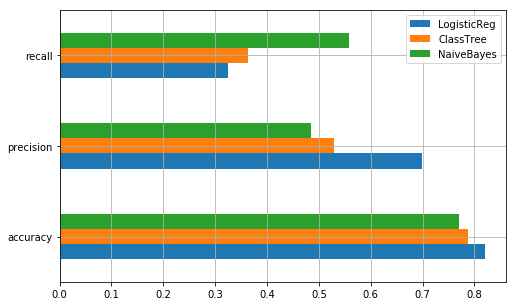

In [41]:
fig,ax = plt.subplots(figsize = (8,5))
metrics.plot(kind = 'barh', ax=ax)
ax.grid();

In [42]:
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1,-1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.5:
        return 'will default'
    else:
        return 'will pay'

In [43]:
pay=defaultCC[defaultCC['default'] == 0]

In [44]:
pay.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1
6,50000.0,37,0,0,0,0,0,0,64400.0,57069.0,...,657.0,1000.0,1000.0,800.0,0,1,0,0,1,0
7,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,...,38000.0,20239.0,13750.0,13770.0,0,1,0,0,1,0


In [45]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal',4000),('age',50),('bill_amt1',500),('bill_amt2',35509),('bill_amt3',689),('bill_amt4',0),('bill_amt5',0),('bill_amt6',0),('pay_amt1',0),('pay_amt2',35509),('pay_amt3',0),('pay_amt4',0),('pay_amt5',0),('pay_amt6',0),('male',1),('grad_school',0),('university',1),('high_school',0),('married',1),('pay_0',-1),('pay_2',-1),('pay_3',-1),('pay_4',0),('pay_5',-1),('pay_6',0)])
new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

'will default'

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [48]:

classifier = Sequential()
classifier.add(Dense(output_dim=10, init='uniform', activation='relu', input_dim=25))
classifier.add(Dropout(p=0.1))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=10,epochs=20)

C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=25, units=10, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.
C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
25500/25500 [==============================] - 20s 789us/step - loss: 0.4730 - acc: 0.8044
Epoch 2/20
25500/25500 [==============================] - 13s 511us/step - loss: 0.4451 - acc: 0.8152
Epoch 3/20
25500/25500 [==============================] - 11s 429us/step - loss: 0.4427 - acc: 0.8177
Epoch 4/20
25500/25500 [==============================] - 11s 417us/step - loss: 0.4414 - acc: 0.8179
Epoch 5/20
25500/25500 [==============================] - 9s 343us/step - loss: 0.4412 - acc: 0.8165
Epoch 6/20
25500/25500 [==============================] - 13s 498us/step - loss: 0.4412 - acc: 0.8163
Epoch 7/20
25500/25500 [==============================] - 13s 493us/step - loss: 0.4394 - acc: 0.8163
Epoch 8/20
25500/25500 [==============================] - 10s 380us/step - loss: 0.4399 - acc: 0.8171
Epoch 9/20
25500/25500 [==============================] - 9s 360us/step - loss: 0.4393 - acc: 0.8168
Epoch 10/20
25500/25500 [===========

In [49]:
y_pred = classifier.predict(X_test)
pred=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        pred.append(1)
    else:
        pred.append(0)